In [ ]:
#
# 効率フロンティアの描画
#
#（Pythonによるファイナンス入門，中妻照雄著，朝倉書店）を参照
#
#　＜＜プログラムのバージョンが新しくなってコードが古くなった部分は修正してあります．＞＞
#
#  by Y.MAEDA（updated at 2010/12/22）
#

In [1]:
#
# 効率フロンティアの計算
#

import cvxpy as cp
import numpy as np
import pandas as pd
import math
import numpy.linalg as lin
import cvxpy as cvx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import sys
FontPath = "/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc"
#FontPath = '/System/Library/Fonts/Osaka.ttf'
jpfont = FontProperties(fname=FontPath)

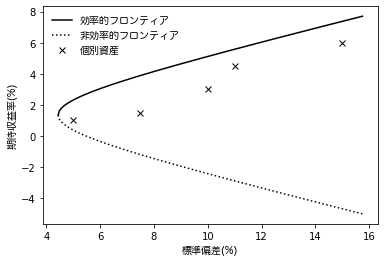

In [2]:
#
# ５つの資産のポートフォリオの場合
# Mu：収益率の平均値
# Stdev：収益率の標準偏差
# CorrMatrix：収益率の相関行列
#
# ＜＜＜＜＜これらの変数を資産の数に応じて計算して，この部分を置き換えてください．＞＞＞＞＞
#

Mu = np.array([1.0, 3.0, 1.5, 6.0, 4.5])
Stdev = np.array([5.0, 10.0, 7.5, 15.0, 11.0])
CorrMatrix = np.array([[1.00, 0.25, 0.18, 0.10, 0.25],
                       [0.25, 1.00, 0.36, 0.20, 0.20],
                       [0.18, 0.36, 1.00, 0.25, 0.36],
                       [0.10, 0.20, 0.25, 1.00, 0.45],
                       [0.25, 0.20, 0.36, 0.45, 1.00]])

Sigma = np.diag(Stdev).dot(CorrMatrix).dot(np.diag(Stdev))
iota = np.ones(Mu.shape)
inv_Sigma = lin.inv(Sigma)

#print(Sigma,iota,inv_Sigma)

A = Mu.dot(inv_Sigma).dot(iota)
B = Mu.dot(inv_Sigma).dot(Mu)
C = iota.dot(inv_Sigma).dot(iota)
D = B*C - A**2
V_Target = np.linspace(Mu.min(), Mu.max(), num=5)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape [0] , Mu.shape [0]))
for idx, Target_Return in enumerate(V_Target):
    V_Weight [idx, :] = (C*Target_Return - A)/D*lin.solve (Sigma, Mu)\
    + (B-A*Target_Return)/D*lin.solve (Sigma, iota)
    V_Risk[idx] = (C/D) * (Target_Return - A/C)**2 + 1.0/C

# 最小分散フロンティアの作図
sigma_gmv = 1.0/np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05*np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs (C*sigma_p**2 - 1.0)*D))/C
mu_p_inefficient = (A - np.sqrt(np.abs(C*sigma_p**2 - 1.0) *D))/C
figi = plt.figure(1, facecolor='w')
plt.plot(sigma_p, mu_p_efficient, 'k-')
plt.plot(sigma_p, mu_p_inefficient, 'k:')
plt.plot(np. sqrt(np.diagonal (Sigma)), Mu, 'kx')
plt.legend ([u'効率的フロンティア', u'非効率的フロンティア', u'個別資産'],
loc='best', frameon=False, prop=jpfont)
plt.xlabel(u'標準偏差(%)', fontproperties=jpfont)
plt.ylabel(u'期待収益率(%)', fontproperties=jpfont)
plt.show()


In [3]:
#
# 期待収率の目標値
#

print('期待収率の目標値\n',V_Target,'\n')

#
# 期待収率の目標値に対する投資割合
#

print('期待収率の目標値に対する投資割合\n',V_Weight)

期待収率の目標値
 [1.   2.25 3.5  4.75 6.  ] 

期待収率の目標値に対する投資割合
 [[ 0.7637103   0.00472626  0.27393586  0.00125535 -0.04362778]
 [ 0.52524494  0.12451024  0.1270893   0.10426038  0.11889514]
 [ 0.28677959  0.24429421 -0.01975726  0.2072654   0.28141806]
 [ 0.04831423  0.36407818 -0.16660382  0.31027042  0.44394098]
 [-0.19015112  0.48386216 -0.31345038  0.41327544  0.6064639 ]]


In [ ]:
####################################################
#
#　効率フロンティアの描画
#　（非負制約を入れた場合）
#
####################################################

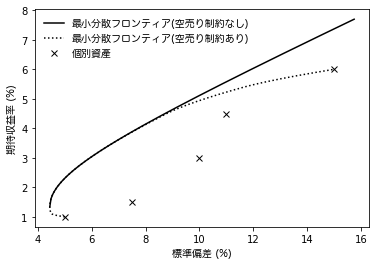

In [4]:
import numpy as np
import numpy.linalg as lin
import cvxpy as cvx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import sys
FontPath = "/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc"
jpfont = FontProperties(fname=FontPath)

# 最小分散ポートフォリオの計算
Mu = np.array([1.0, 3.0, 1.5, 6.0, 4.5])
Stdev = np.array([5.0, 10.0, 7.5, 15.0, 11.0])
CorrMatrix = np.array([[1.00, 0.25, 0.18, 0.10, 0.25],
[0.25, 1.00, 0.36, 0.20, 0.20],
[0.18, 0.36, 1.00, 0.25, 0.36],
[0.10, 0.20, 0.25, 1.00, 0.45],
[0.25, 0.20, 0.36, 0.45, 1.00]])
                       
Sigma = np.diag(Stdev).dot (CorrMatrix).dot (np.diag (Stdev))
iota = np.ones (Mu.shape)
inv_Sigma = lin.inv(Sigma)
A = Mu.dot (inv_Sigma).dot (iota)
B = Mu.dot (inv_Sigma).dot (Mu)
C = iota. dot (inv_Sigma).dot (iota)
D = B*C - A**2

# 空売り制約の下での分散最小化問題の設定
Weight = cvx.Variable (Mu.shape [0])

#（Target_Return = cvx.Parameter(sign='positive')）　←古いバージョン
Target_Return=cvx.Parameter(nonneg=True)

Risk_Variance = cvx.quad_form(Weight, Sigma)
Opt_Portfolio = cvx.Problem (cvx.Minimize (Risk_Variance),
    [Weight. T @ Mu == Target_Return,
    #cvx.sum_entries(Weight) == 1.0,　←古いバージョン
    cvx.sum(Weight) == 1.0,
    Weight >= 0.0])

# 空売り制約の下での最小分散フロンティアの計算
V_Target = np.linspace (Mu.min(), Mu.max(), num=250)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape [0], Mu.shape [0]))
for idx, Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve()
    V_Weight[idx, :] = Weight.value.T
    V_Risk[idx] = np.sqrt(Risk_Variance.value)
    
# 最小分散フロンティアの作図
sigma_gmv = 1.0/np.sqrt(C)
sigma_p = np.linspace (sigma_gmv, 1.05*np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs (C*sigma_p**2 - 1.0)*D))/C
figi = plt.figure(1, facecolor='w')
plt.plot (sigma_p, mu_p_efficient, 'k-')
plt.plot(V_Risk, V_Target, 'k:')
plt.plot(np.sqrt (np.diagonal (Sigma)), Mu, 'kx')
plt.legend([u'最小分散フロンティア(空売り制約なし)',
    u'最小分散フロンティア(空売り制約あり)',
    u'個別資產'],
    loc='best', frameon=False, prop=jpfont)           
plt.xlabel(u'標準偏差 (%)', fontproperties=jpfont)
plt.ylabel (u'期待収益率 (%)', fontproperties=jpfont)

# 投資比率の推移の作図
fig2 = plt.figure(2, facecolor='w')
plt.stackplot (V_Target, V_Weight. T*100,
    colors=tuple([tuple(gray*np.ones (3))
        for gray in np.linspace(0.4,0.8, num=Mu.shape [0])]))  

plt.axis([Mu.min(), Mu.max(), 0.0, 100.0])
plt.legend ( [u'資産1', u'資産2', '資産3', u'資産', u'資産5'],
loc='upper left', bbox_to_anchor=(1.0, 1.0),

frameon=False, prop=jpfont)
plt.xlabel (u' 目標期待収益率 (%)', fontproperties=jpfont)
plt.ylabel(u'投資比率 (%)', fontproperties=jpfont)
plt.show()



In [71]:
#V_Target

In [72]:
#for i in range(len(V_Weight)):
#    print(V_Weight[i])

In [5]:
#
# 最適ポートフォリオの決定
#

umax=0
for i in range(len(V_Weight)):
    u=(math.log(V_Target[i])+math.log(18-V_Risk[i]))*100
    if u>umax:
        umax=u
        maxi=i
    print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
          %(V_Target[i],V_Risk[i],u))
    print('ポートフォリオ=%.3f,%.3f,%.3f,%.3f,%.3f'
          %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2],V_Weight[i][3],V_Weight[i][4]))
print('\n効用の最大値（',maxi,'）',np.round(umax,3))

( 0 ) 目標収益率=1.000 リスク=5.000 効用=256.495
ポートフォリオ=1.000,-0.000,-0.000,-0.000,-0.000
( 1 ) 目標収益率=1.020 リスク=4.862 効用=259.536
ポートフォリオ=0.960,-0.000,0.040,-0.000,-0.000
( 2 ) 目標収益率=1.040 リスク=4.744 効用=262.383
ポートフォリオ=0.920,-0.000,0.080,-0.000,-0.000
( 3 ) 目標収益率=1.060 リスク=4.646 効用=265.031
ポートフォリオ=0.880,-0.000,0.120,-0.000,-0.000
( 4 ) 目標収益率=1.080 リスク=4.570 効用=267.475
ポートフォリオ=0.839,-0.000,0.161,-0.000,-0.000
( 5 ) 目標収益率=1.100 リスク=4.517 効用=269.711
ポートフォリオ=0.799,-0.000,0.201,-0.000,-0.000
( 6 ) 目標収益率=1.120 リスク=4.488 効用=271.737
ポートフォリオ=0.759,-0.000,0.241,-0.000,-0.000
( 7 ) 目標収益率=1.141 リスク=4.477 効用=273.588
ポートフォリオ=0.740,0.007,0.253,-0.000,-0.000
( 8 ) 目標収益率=1.161 リスク=4.471 効用=275.384
ポートフォリオ=0.733,0.014,0.251,0.001,0.000
( 9 ) 目標収益率=1.181 リスク=4.465 効用=277.143
ポートフォリオ=0.729,0.017,0.250,0.004,0.000
( 10 ) 目標収益率=1.201 リスク=4.459 効用=278.868
ポートフォリオ=0.725,0.020,0.248,0.008,-0.000
( 11 ) 目標収益率=1.221 リスク=4.455 効用=280.560
ポートフォリオ=0.721,0.022,0.246,0.011,0.000
( 12 ) 目標収益率=1.241 リスク=4.451 効用=282.219
ポートフォリオ=0

In [6]:
#
#
# 最小分散フロンティアと無差別曲線の作図
#
#

sigma_gmv = 1.0/np.sqrt(C)
sigma_p = np.linspace (sigma_gmv, 1.05*np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs (C*sigma_p**2 - 1.0)*D))/C

fig, ax = plt.subplots(1, facecolor='w')
ax.plot(sigma_p, mu_p_efficient, 'k-')
ax.plot(V_Risk, V_Target, 'k:')
ax.plot(np.sqrt (np.diagonal (Sigma)), Mu, 'kx')
ax.legend([u'最小分散フロンティア(空売り制約なし)',
    u'最小分散フロンティア(空売り制約あり)',
    u'個別資產'],
    loc='best', frameon=False, prop=jpfont)           
ax.set_xlabel(u'標準偏差 (%)', fontproperties=jpfont)
ax.set_ylabel (u'期待収益率 (%)', fontproperties=jpfont)

#
#　無差別曲線の描画
#

# 無差別曲線の作成
wn=100
ret_range = [1, 6.5] # リターンのレンジ
risk_range = [4, 16] # リスクのレンジ
ret_lin = np.linspace(ret_range[0], ret_range[1], wn) # リターンの刻み
risk_lin = np.linspace(risk_range[0], risk_range[1], wn) # リスクの刻み
ret, risk = np.meshgrid(ret_lin,risk_lin)

U = np.zeros((len(ret_lin), len(risk_lin)))

for ret_i in range(wn):
    for risk_i in range(wn):
        U[risk_i,ret_i] = (math.log(ret_lin[ret_i])+math.log(18-risk_lin[risk_i]))*100
        #print(J[i1, i0])

# 無差別曲線のプロット
cont = plt.contour(risk,ret, U, 30, colors='black',
                   levels=(360, umax, 380, 390),linewidths=0.7,
                   linestyles="dashed")
cont.clabel(fmt='%1.1f', fontsize=8)

plt.show()


In [ ]:
####################################
#
#　多変量正規分布からの乱数発生と保存
#
####################################

In [7]:
import numpy as np
import numpy.linalg as lin
import scipy.stats as st
import cvxpy as cvx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import sys
FontPath = "/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc"
jpfont = FontProperties(fname=FontPath)

# 多変量正規分布からの乱数発生と保存
Mu =np.array([1.0, 3.0, 1.5, 6.0, 4.5])
Stdev =np.array([5.0, 10.0, 7.5, 15.0, 11.0])
CorrMatrix=np.array([[1.00, 0.25, 0.18, 0.10, 0.25],
    [0.25, 1.00, 0.3, 0.20, 0.20],
    [0.18, 0.36, 1.00, 0.25, 0.36],
    [0.10, 0.20, 0.25, 1.00, 0.45],
    [0.25, 0.20, 0.36, 0.45, 1.00]])
Sigma = np.diag(Stdev).dot(CorrMatrix).dot(np.diag(Stdev))
np.random.seed(9999)
T=120
End_of_Month=pd.date_range('1/1/2007',periods=T,freq='M')
Asset_Names=[u'資產1',u'資產2',u'資產3',u'資產4','資產5']
Asset_Return=pd.DataFrame(st.multivariate_normal(Mu,Sigma).rvs(T),
    index=End_of_Month,columns=Asset_Names)
Asset_Return.to_csv('asset_return_data.csv')
Asset_Return


/Users/maeda2020/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_multivariate.py:664: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


資產1        資產2        資產3        資產4        資產5
2007-01-31  -0.051628   6.460611  -1.025596  -4.164680   3.671446
2007-02-28   1.669600  18.872663  18.339269  -4.092015  -6.339472
2007-03-31  -3.463736  11.433420  -7.603830   8.371304   4.815862
2007-04-30  -3.312215  12.581170  -3.884209 -12.857615 -15.605465
2007-05-31  -3.237752  -6.948028  -1.920874  -6.551910  25.687519
...               ...        ...        ...        ...        ...
2016-08-31  -3.326545  -8.141094   1.165276  24.935530  -3.886551
2016-09-30  10.337658  12.932816  14.684933  24.629487  19.026871
2016-10-31   5.555499   5.385399   9.959130  17.360818  -3.698024
2016-11-30   2.245976  -5.241308   3.065173   8.085026  20.041733
2016-12-31   2.813892  -6.247845  -3.990868   0.976851   8.554629

[120 rows x 5 columns]

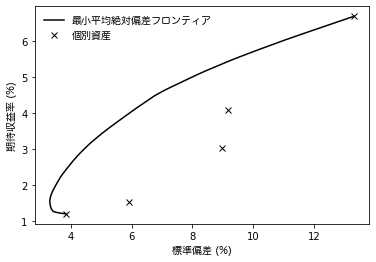

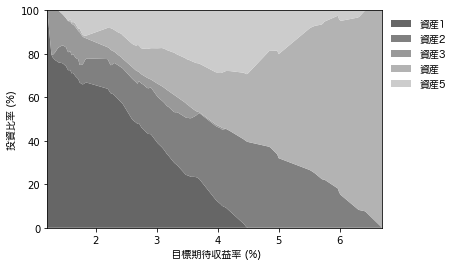

In [8]:
#
#　平均絶対偏差最小化問題　
#

# データの読み込み
R=pd.read_csv('asset_return_data.csv',index_col=0)

T=R.shape[0]
N=R.shape[1]
Mu=R.mean().values
Return_Dev=(R-Mu).values/T

# 均絶対偏差最小化問題の設定
Weight=cvx.Variable(N)
Deviation=cvx.Variable(T)
Target_Return=cvx.Parameter(nonneg=True)
Risk_AD=cvx.norm(Deviation,1)

# 目的関数
Obj=cvx.Minimize(Risk_AD)
# 制約条件
Constraint= [Return_Dev @ Weight==Deviation,
     Weight.T @ Mu==Target_Return,
     cvx.sum(Weight)==1.0,
     Weight>=0.0]

Opt_Portfolio=cvx.Problem(Obj,Constraint)

# 最小平均絶対偏差フロンティアの計算
V_Target=np.linspace(Mu.min(),Mu.max(),num=250)
V_Risk=np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape [0], Mu.shape [0]))
for idx,Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve()
    V_Weight[idx, :] = Weight.value.T
    V_Risk[idx]=Risk_AD.value
    
# 最小平均絶対偏差フロンティアのグラフの作成
fig1=plt.figure(1,facecolor='w')
plt.plot(V_Risk,V_Target,'k-')
plt.plot((R-Mu).abs().mean().values,Mu,'kx')
plt.legend([u'最小平均絶対偏差フロンティア',u'個別資産'],
           loc='best',frameon=False, prop=jpfont)
plt.xlabel(u'標準偏差 (%)', fontproperties=jpfont)
plt.ylabel (u'期待収益率 (%)', fontproperties=jpfont)
plt.show()

# 投資比率の推移の作図
fig2 = plt.figure(2, facecolor='w')
plt.stackplot (V_Target, V_Weight. T*100,
    colors=tuple([tuple(gray*np.ones (3))
        for gray in np.linspace(0.4,0.8, num=Mu.shape [0])]))  

plt.axis([Mu.min(), Mu.max(), 0.0, 100.0])
plt.legend ( [u'資産1', u'資産2', '資産3', u'資産', u'資産5'],
loc='upper left', bbox_to_anchor=(1.0, 1.0),

frameon=False, prop=jpfont)
plt.xlabel (u' 目標期待収益率 (%)', fontproperties=jpfont)
plt.ylabel(u'投資比率 (%)', fontproperties=jpfont)
plt.show()



In [9]:
#
# 最適ポートフォリオの決定
#

umax=0
for i in range(len(V_Weight)):
    u=(math.log(V_Target[i])+math.log(18-V_Risk[i]))*100
    if u>umax:
        umax=u
        maxi=i
    print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
          %(V_Target[i],V_Risk[i],u))
    print('ポートフォリオ=%.3f,%.3f,%.3f,%.3f,%.3f'
          %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2],V_Weight[i][3],V_Weight[i][4]))
print('\n効用の最大値（',maxi,'）',np.round(umax,3))

( 0 ) 目標収益率=1.205 リスク=3.843 効用=283.630
ポートフォリオ=1.000,-0.000,0.000,-0.000,-0.000
( 1 ) 目標収益率=1.227 リスク=3.648 効用=286.808
ポートフォリオ=0.932,-0.000,0.068,-0.000,-0.000
( 2 ) 目標収益率=1.249 リスク=3.518 効用=289.493
ポートフォリオ=0.864,-0.000,0.136,-0.000,-0.000
( 3 ) 目標収益率=1.271 リスク=3.430 効用=291.854
ポートフォリオ=0.797,0.000,0.203,-0.000,-0.000
( 4 ) 目標収益率=1.293 リスク=3.405 効用=293.743
ポートフォリオ=0.783,0.012,0.205,-0.000,-0.000
( 5 ) 目標収益率=1.315 リスク=3.387 効用=295.559
ポートフォリオ=0.776,0.025,0.199,-0.000,0.000
( 6 ) 目標収益率=1.337 リスク=3.372 効用=297.330
ポートフォリオ=0.770,0.038,0.191,-0.000,-0.000
( 7 ) 目標収益率=1.359 リスク=3.357 効用=299.066
ポートフォリオ=0.766,0.052,0.181,-0.000,-0.000
( 8 ) 目標収益率=1.381 リスク=3.346 効用=300.752
ポートフォリオ=0.762,0.066,0.173,-0.000,0.000
( 9 ) 目標収益率=1.403 リスク=3.340 効用=302.381
ポートフォリオ=0.760,0.072,0.164,0.000,0.005
( 10 ) 目標収益率=1.425 リスク=3.334 効用=303.976
ポートフォリオ=0.759,0.077,0.154,0.000,0.011
( 11 ) 目標収益率=1.447 リスク=3.330 効用=305.544
ポートフォリオ=0.757,0.081,0.145,0.000,0.016
( 12 ) 目標収益率=1.469 リスク=3.325 効用=307.087
ポートフォリオ=0.753,0

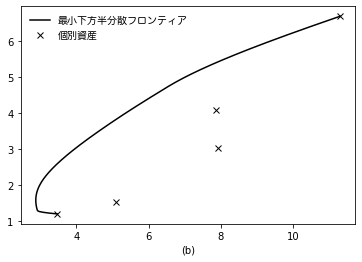

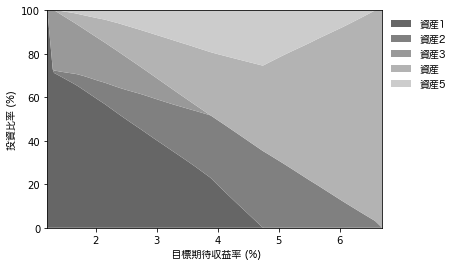

In [10]:
########################
#
# 下方半分散最小化
#
########################


R=pd.read_csv('asset_return_data.csv',index_col=0)

T=R.shape[0]
N=R.shape[1]
Mu=R.mean().values

Return_Dev=(R-Mu).values/np.sqrt(T)

# 下方半分散最小化問題の設定
Weight=cvx.Variable(N)
Deviation=cvx.Variable(T)

Target_Return=cvx.Parameter(nonneg=True)
Risk_Semivariance=cvx.sum_squares(Deviation)

Opt_Portfolio=cvx.Problem(cvx.Minimize(Risk_Semivariance),
    [Return_Dev @ Weight+Deviation>=0.0,
     Weight.T @ Mu==Target_Return,
     cvx.sum(Weight)==1.0,
     Deviation>=0.0,
     Weight>=0.0])

# 下方半分散最小化フロンティアの計算
V_Target=np.linspace(Mu.min(),Mu.max(),num=250)
V_Risk=np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape [0], Mu.shape [0]))
for idx,Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve(solver=cp.ECOS)
    V_Weight[idx, :] = Weight.value.T
    V_Risk[idx]=np.sqrt(Risk_Semivariance.value)
    
#下方半分散最小化フロンティアのグラフの作成
fig1=plt.figure(1,facecolor='w')
plt.plot(V_Risk,V_Target,'k-')
plt.plot(np.sqrt(((R[R<=Mu]-Mu)**2).sum().values/T),Mu,'kx')
plt.legend([u'最小下方半分散フロンティア',u'個別資産'],
           loc='best',frameon=False,prop=jpfont)
plt.xlabel(u'(b)')
plt.show()

# 投資比率の推移の作図
fig2 = plt.figure(2, facecolor='w')
plt.stackplot (V_Target, V_Weight. T*100,
    colors=tuple([tuple(gray*np.ones (3))
        for gray in np.linspace(0.4,0.8, num=Mu.shape [0])]))  

plt.axis([Mu.min(), Mu.max(), 0.0, 100.0])
plt.legend ( [u'資産1', u'資産2', '資産3', u'資産', u'資産5'],
loc='upper left', bbox_to_anchor=(1.0, 1.0),

frameon=False, prop=jpfont)
plt.xlabel (u' 目標期待収益率 (%)', fontproperties=jpfont)
plt.ylabel(u'投資比率 (%)', fontproperties=jpfont)
plt.show()





In [11]:
for i in range(len(V_Target)):
    print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
          %(V_Target[i],V_Risk[i],(math.log(V_Target[i])+math.log(18-V_Risk[i]))*100))
    print('ポートフォリオ=%.3f,%.3f,%.3f,%.3f,%.3f'
         %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2],V_Weight[i][3],V_Weight[i][4]))

( 0 ) 目標収益率=1.205 リスク=3.468 効用=286.241
ポートフォリオ=1.000,-0.000,0.000,-0.000,-0.000
( 1 ) 目標収益率=1.227 リスク=3.253 効用=289.525
ポートフォリオ=0.932,-0.000,0.068,-0.000,-0.000
( 2 ) 目標収益率=1.249 リスク=3.084 効用=292.446
ポートフォリオ=0.864,-0.000,0.136,-0.000,-0.000
( 3 ) 目標収益率=1.271 リスク=2.973 効用=294.940
ポートフォリオ=0.797,-0.000,0.203,0.000,-0.000
( 4 ) 目標収益率=1.293 リスク=2.924 効用=296.990
ポートフォリオ=0.729,-0.000,0.271,-0.000,-0.000
( 5 ) 目標収益率=1.315 リスク=2.915 効用=298.741
ポートフォリオ=0.712,0.011,0.277,0.000,0.000
( 6 ) 目標収益率=1.337 リスク=2.909 効用=300.446
ポートフォリオ=0.709,0.013,0.274,0.003,0.000
( 7 ) 目標収益率=1.359 リスク=2.903 効用=302.121
ポートフォリオ=0.706,0.016,0.272,0.007,0.000
( 8 ) 目標収益率=1.381 リスク=2.898 効用=303.766
ポートフォリオ=0.702,0.018,0.269,0.010,0.001
( 9 ) 目標収益率=1.403 リスク=2.893 効用=305.381
ポートフォリオ=0.699,0.020,0.266,0.013,0.002
( 10 ) 目標収益率=1.425 リスク=2.889 効用=306.969
ポートフォリオ=0.696,0.023,0.263,0.016,0.003
( 11 ) 目標収益率=1.447 リスク=2.885 効用=308.528
ポートフォリオ=0.692,0.025,0.261,0.018,0.004
( 12 ) 目標収益率=1.469 リスク=2.882 効用=310.061
ポートフォリオ=0.689,0.027,

In [12]:
########################
#
# 期待ショートフォール最小化
#
########################

R=pd.read_csv('asset_return_data.csv',index_col=0)

T=R.shape[0]
N=R.shape[1]
Mu=R.mean().values

Return=R.values/T

# 期待ショートフォール最小化問題の設定
Weight= cvx.Variable(N)
Deviation=cvx.Variable(T)
VaR = cvx.Variable()
Alpha = cvx.Parameter(nonneg=True)
Target_Return = cvx.Parameter(nonneg=True)
Risk_ES = cvx.sum(Deviation)/Alpha - VaR

Opt_Portfolio = cvx.Problem(cvx.Minimize(Risk_ES),
    [Weight.T @ Mu == Target_Return,
    cvx.sum(Weight)==1.0,
    Weight >= 0.0,
    Deviation >= 0.0,
    Return @ Weight - VaR/T + Deviation >= 0.0])

# 最小ESフロンティアの計算
V_Alpha = np.array([0.05, 0.10, 0.25, 0.50])
V_Target=np.linspace(Mu.min(), Mu.max(), num=250)
V_Risk = np.zeros((V_Target.shape[0] ,V_Alpha.shape[0]))
V_Weight = np.zeros((V_Target.shape [0], Mu.shape [0]))

for idx_col, Alpha.value in enumerate(V_Alpha):
    Alpha.value = V_Alpha[idx_col]
    for idx_row, Target_Return.value in enumerate(V_Target):
        Opt_Portfolio.solve()
        #Opt_Portfolio.solve(solver=cp.ECOS)
        V_Weight[idx_row, :] = Weight.value.T
        V_Risk[idx_row, idx_col] = Risk_ES.value

# のグラフの作成
fig1 = plt.figure(1, facecolor='w')
plt.plot(V_Risk[:,0], V_Target, 'k-')
plt.plot((-R[R <= R.quantile(V_Alpha[0])]).mean().values, Mu, 'kx')
plt.legend ( [u'最小ESフロンティア', u'個別資産'],
    loc='best', frameon=False, prop=jpfont)
plt.xlabel (u'期待ショートフォール (%)', fontproperties=jpfont)
plt.ylabel(u'期待収益率 (%)', fontproperties=jpfont)
fig2 = plt.figure(2, facecolor='w')
LineTypes = ['solid', 'dashed', 'dashdot', 'dotted']

for idx, Alpha.value in enumerate (V_Alpha):
    plt.plot(V_Risk[:,idx], V_Target, color='k', linestyle=LineTypes[idx])
plt.legend( [u'最小ESフロンティア($\\alpha$={0:4.2f})'.format(a)
    for a in V_Alpha],
    loc='best', frameon=False, prop=jpfont)
plt.xlabel(u'期待ショートフォール (%)', fontproperties=jpfont)
plt.ylabel(u'期待収益率 (%)', fontproperties=jpfont)
plt.show()

/Users/maeda2020/opt/anaconda3/lib/python3.8/site-packages/cvxpy/reductions/solvers/solving_chain.py:167: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


In [12]:
#
# ここは未完成
#
for i in range(len(V_Target)):
    print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
          %(V_Target[i],V_Risk[i][0],(math.log(V_Target[i])+math.log(18-V_Risk[i][0]))*100))
    print('ポートフォリオ=%.3f,%.3f,%.3f,%.3f,%.3f'
         %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2],V_Weight[i][3],V_Weight[i][4]))

( 0 ) 目標収益率=1.205 リスク=9.569 効用=231.794
ポートフォリオ=1.000,-0.000,0.000,-0.000,-0.000
( 1 ) 目標収益率=1.227 リスク=8.651 効用=243.947
ポートフォリオ=0.932,-0.000,0.068,-0.000,-0.000
( 2 ) 目標収益率=1.249 リスク=7.857 効用=253.881
ポートフォリオ=0.864,-0.000,0.136,-0.000,-0.000
( 3 ) 目標収益率=1.271 リスク=7.203 効用=261.882
ポートフォリオ=0.807,0.002,0.191,-0.000,0.000
( 4 ) 目標収益率=1.293 リスク=6.826 効用=267.038
ポートフォリオ=0.802,0.016,0.182,-0.000,-0.000
( 5 ) 目標収益率=1.315 リスク=6.530 効用=271.344
ポートフォリオ=0.786,0.027,0.186,-0.000,0.000
( 6 ) 目標収益率=1.337 リスク=6.387 効用=274.248
ポートフォリオ=0.764,0.037,0.199,-0.000,-0.000
( 7 ) 目標収益率=1.359 リスク=6.297 効用=276.656
ポートフォリオ=0.757,0.045,0.196,0.000,0.003
( 8 ) 目標収益率=1.381 リスク=6.234 効用=278.801
ポートフォリオ=0.756,0.050,0.185,-0.000,0.008
( 9 ) 目標収益率=1.403 リスク=6.190 効用=280.758
ポートフォリオ=0.755,0.057,0.175,-0.000,0.013
( 10 ) 目標収益率=1.425 リスク=6.169 効用=282.502
ポートフォリオ=0.755,0.063,0.165,-0.000,0.018
( 11 ) 目標収益率=1.447 リスク=6.147 効用=284.216
ポートフォリオ=0.749,0.069,0.160,0.000,0.022
( 12 ) 目標収益率=1.469 リスク=6.126 効用=285.908
ポートフォリオ=0.748,0.

ValueError: math domain error

In [13]:
#V_Weight

array([[ 1.00000000e+00, -2.12580265e-12,  4.89020880e-11,
        -1.34410619e-12, -1.60562076e-12],
       [ 9.32228269e-01, -1.14951545e-11,  6.77717309e-02,
        -8.53057066e-12, -1.04076811e-11],
       [ 8.64456539e-01, -8.49429745e-14,  1.35543461e-01,
        -1.09949991e-12, -1.30027807e-12],
       ...,
       [-2.47785115e-12,  1.20318969e-02, -3.15581809e-12,
         9.87968103e-01,  2.31180030e-11],
       [-1.36058797e-12,  6.01594845e-03, -2.06176772e-12,
         9.93984052e-01,  8.49127749e-12],
       [-1.24449042e-12,  5.61657541e-12, -1.83509362e-12,
         1.00000000e+00, -1.17675798e-12]])